In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', parse_dates=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
print(df.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [6]:
new_df = df.drop(columns=['ST_COLCODE', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR',
       'ST_COLDESC','SPEEDING', 'SDOTCOLNUM', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'INATTENTIONIND', 'UNDERINFL', 'SDOT_COLCODE', 'SDOT_COLDESC', 'PEDROWNOTGRNT'])
new_df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2013/03/27 00:00:00+00,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2004/01/28 00:00:00+00,At Intersection (intersection related),Raining,Wet,Daylight


In [7]:
new_df.shape

(194673, 11)

In [8]:
print(new_df.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'INCDATE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'],
      dtype='object')


In [9]:
type('INCDATE')

str

In [10]:
new_df['INCDATE'].head()

0    2013/03/27 00:00:00+00
1    2006/12/20 00:00:00+00
2    2004/11/18 00:00:00+00
3    2013/03/29 00:00:00+00
4    2004/01/28 00:00:00+00
Name: INCDATE, dtype: object

In [11]:
new_df['year'] = pd.DatetimeIndex(df['INCDATE']).year
new_df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,year
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2013/03/27 00:00:00+00,At Intersection (intersection related),Overcast,Wet,Daylight,2013
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,2006
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),Overcast,Dry,Daylight,2004
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),Clear,Dry,Daylight,2013
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2004/01/28 00:00:00+00,At Intersection (intersection related),Raining,Wet,Daylight,2004


In [12]:
new_df['year'].value_counts()

2006    15188
2005    15115
2007    14456
2008    13660
2015    12995
2004    11865
2014    11841
2009    11734
2016    11659
2011    10919
2012    10907
2017    10873
2010    10808
2013    10577
2018    10419
2019     9412
2020     2245
Name: year, dtype: int64

In [13]:
new_df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [14]:
new_df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [15]:
new_df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [16]:
new_df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [17]:
new_df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [18]:
new_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [19]:
new_df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [20]:
new_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [21]:
missing_data = new_df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,year
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

year
False    194673
Name: year, dtype: int64



In [23]:
new_df.replace('', np.nan, inplace = True)
new_df.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,year
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2013/03/27 00:00:00+00,At Intersection (intersection related),Overcast,Wet,Daylight,2013
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,2006
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),Overcast,Dry,Daylight,2004
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),Clear,Dry,Daylight,2013
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2004/01/28 00:00:00+00,At Intersection (intersection related),Raining,Wet,Daylight,2004


In [24]:
avg_X = df["X"].astype("float").mean(axis=0)
print("Average of X:", avg_X)

Average of X: -122.33051843904114


In [25]:
new_df["X"].replace(np.nan, avg_X, inplace=True)

In [26]:
avg_Y = df["Y"].astype("float").mean(axis=0)
print("Average of Y:", avg_Y)

Average of Y: 47.619542517688615


In [27]:
new_df["Y"].replace(np.nan, avg_Y, inplace=True)

In [28]:
new_df['ADDRTYPE'].value_counts().idxmax()

'Block'

In [29]:
new_df['ADDRTYPE'].replace(np.nan, 'Block', inplace=True)

In [30]:
new_df['COLLISIONTYPE'].value_counts().idxmax()

'Parked Car'

In [31]:
new_df['COLLISIONTYPE'].replace(np.nan, 'Parked Car', inplace=True)

In [32]:
new_df['JUNCTIONTYPE'].value_counts().idxmax()

'Mid-Block (not related to intersection)'

In [33]:
new_df['JUNCTIONTYPE'].replace(np.nan, 'Mid-Block (not related to intersection)', inplace=True)

In [34]:
new_df['WEATHER'].value_counts().idxmax()

'Clear'

In [35]:
new_df['WEATHER'].replace(np.nan, 'Clear', inplace=True)

In [36]:
new_df['ROADCOND'].value_counts().idxmax()

'Dry'

In [37]:
new_df['ROADCOND'].replace(np.nan, 'Dry', inplace=True)

In [38]:
new_df['LIGHTCOND'].value_counts().idxmax()

'Daylight'

In [39]:
new_df['LIGHTCOND'].replace(np.nan, 'Daylight', inplace=True)

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

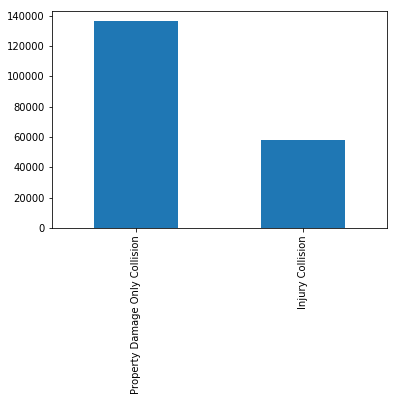

In [41]:
new_df['SEVERITYDESC'].value_counts().plot(kind = 'bar')

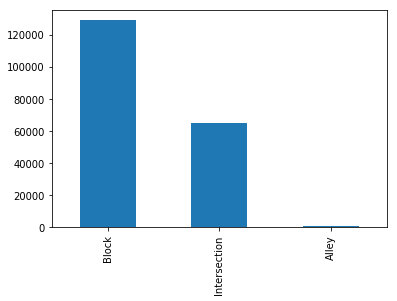

In [42]:
new_df['ADDRTYPE'].value_counts().plot(kind = 'bar')

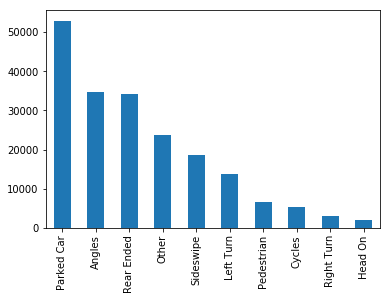

In [43]:
new_df['COLLISIONTYPE'].value_counts().plot(kind = 'bar')

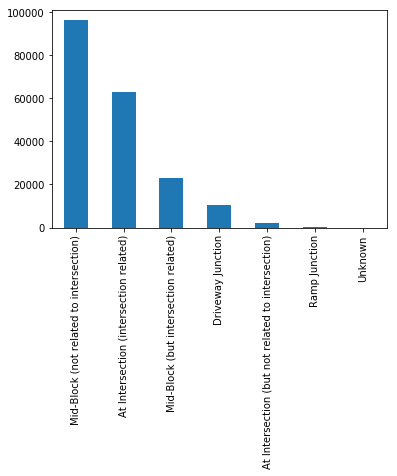

In [44]:
new_df['JUNCTIONTYPE'].value_counts().plot(kind = 'bar')

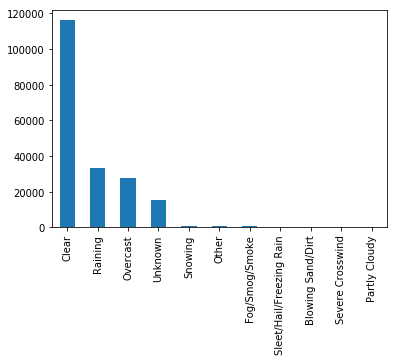

In [45]:
new_df['WEATHER'].value_counts().plot(kind = 'bar')

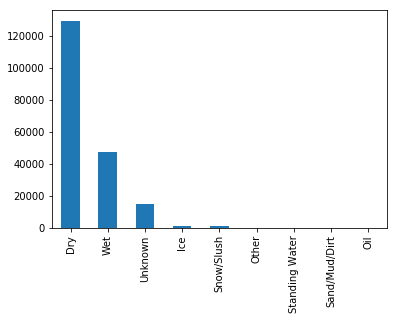

In [46]:
new_df['ROADCOND'].value_counts().plot(kind = 'bar')

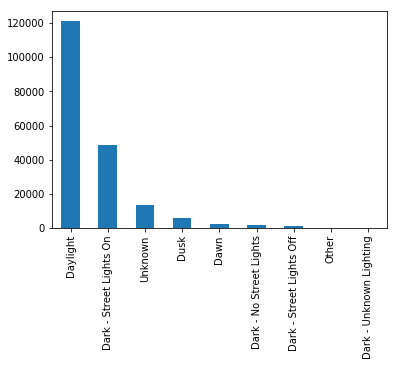

In [47]:
new_df['LIGHTCOND'].value_counts().plot(kind = 'bar')

In [48]:
new_df.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
SEVERITYDESC     0
COLLISIONTYPE    0
INCDATE          0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
year             0
dtype: int64

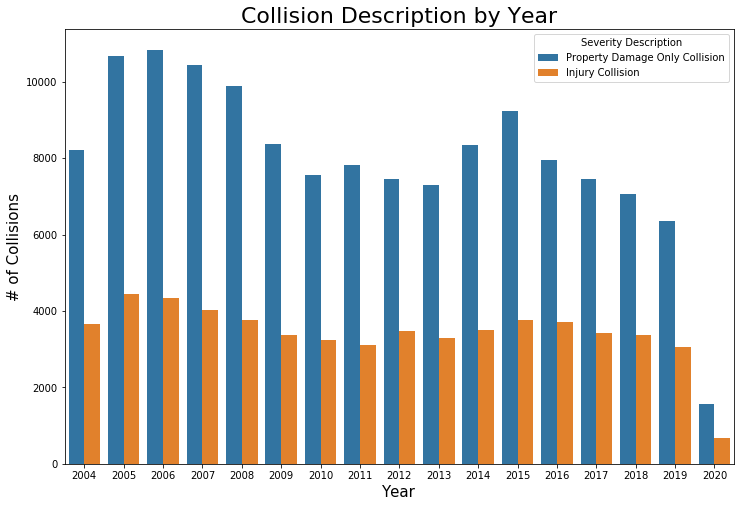

In [49]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='year', hue='SEVERITYDESC', data=new_df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'])
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('# of Collisions', fontsize=15)
ax.set_title('Collision Description by Year', fontsize=22)
ax.legend(title='Severity Description')